In [27]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading "fish_clean" dataset
df_clean = pd.read_csv("fish_clean.csv", index_col=0)
df_clean.head()

,weight,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish,height_scaled,width_scaled
0,242.0,0,0,0,0,0,0,0.628166,-0.253837
1,290.0,0,0,0,0,0,0,0.822734,-0.083985
2,340.0,0,0,0,0,0,0,0.802337,0.147464
3,363.0,0,0,0,0,0,0,0.872322,0.004965
4,430.0,0,0,0,0,0,0,0.815557,0.405998


In [5]:
# Defining X
X = df_clean.drop(labels="weight", axis=1)
X.sample(5)

,species_Parkki,species_Perch,species_Pike,species_Roach,species_Smelt,species_Whitefish,height_scaled,width_scaled
2,0,0,0,0,0,0,0.802337,0.147464
48,0,0,0,1,0,0,-0.267496,-0.364017
1,0,0,0,0,0,0,0.822734,-0.083985
69,1,0,0,0,0,0,0.380372,-0.466529
65,1,0,0,0,0,0,0.056366,-0.688744


In [6]:
#Defining y
y = df_clean.filter(items=["weight"])
y.sample(5)

,weight
144,1650.0
91,130.0
69,200.0
46,140.0
65,150.0


In [7]:
# X and y Shape
X.shape, y.shape

((152, 8), (152, 1))

In [8]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((121, 8), (31, 8), (121, 1), (31, 1))

In [9]:
# Polynomial plot function
def poly_plot(feature, y_train_target, degree_number: list):
    """
    Ploting different degrees of polynomial regression upto "degree_number".
    You should apply the first parameter in this format: "X_train.feature".
    """
    x = np.squeeze(feature)
    y = np.squeeze(y_train_target)

    # print(x.shape)    # Debugging
    # print(y.shape)    # Debugging

    poly_func = dict()
    # Polynomial regression
    for d in degree_number:
        poly_func[d] = np.poly1d(np.polyfit(x, y, deg=d))

    # print(poly_func)    # Debugging
    
    # Generate evenly spaced values for plotting polynomial regression
    values = np.linspace(start = x.min(), stop = x.max(), num = len(x))

    # Plotting Polynomial regression
    plt.scatter(x, y, color="blue")
    
    c = "_rgbmyk"
    l = {1:"Linear",
         2:"Quadratic",
         3:"Cubic",
         4:"Quartic",
         5:"Quintic"}
    
    for d in degree_number:
        plt.plot(values, poly_func[d](values), color=c[d], label=l[d], linewidth=2)
    plt.xlabel(feature.name)
    plt.ylabel("Weight")
    plt.title(f"Polynomial Plot in different degrees for {feature.name}")
    plt.legend()
    plt.show()

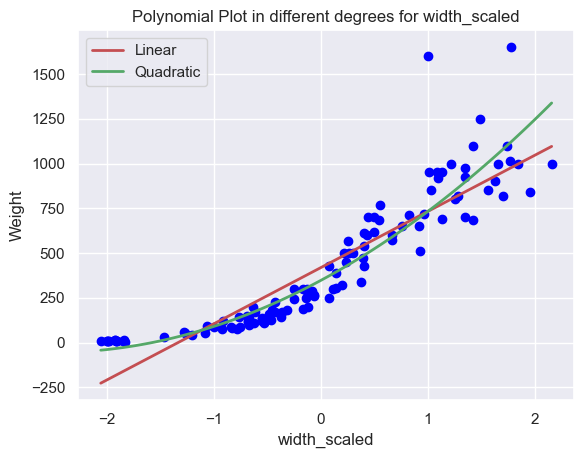

In [10]:
# Plotting polynomial regression for "width_scaled"
poly_plot(X_train.width_scaled, y_train, degree_number=[1, 2])

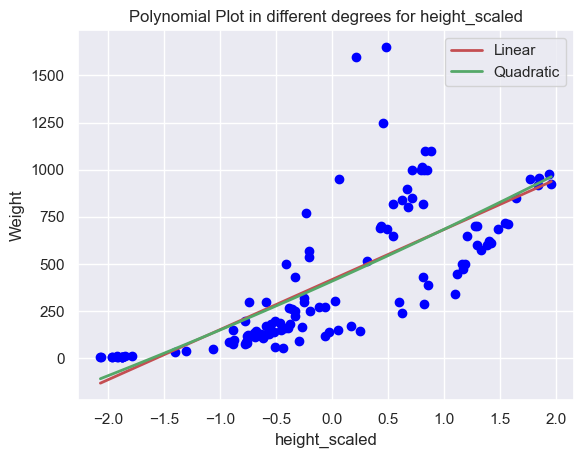

In [11]:
# Plotting polynomial regression for "height_scaled"
poly_plot(X_train.height_scaled, y_train, degree_number=[1, 2])

**Insight**
From the above pictures we can easily observre that the second of polynomial regression fits better on the trained data. So we use it for model prediction.

In [13]:
# Polynomial regression using sklearn for model prediction
# Creating "X_train_poly_transformed"
poly = PolynomialFeatures(degree = 2)
X_train_poly_transformed = poly.fit_transform(X_train)

In [18]:
# Fitting "poly" on "X_train_poly_transformed" and "y_train"
poly.fit(X_train_poly_transformed, y_train)

PolynomialFeatures()

In [21]:
# Fitting "LinearRegression" instance on "X_train_poly_transformed" and "y_train". (Training "X_train_poly_transformed" and "y_train")
reg_model = LinearRegression()
reg_model.fit(X_train_poly_transformed, y_train)

LinearRegression()

In [22]:
# Creating "X_test_poly_transformed"
X_test_poly_transformed = poly.fit_transform(X_test)

In [30]:
# Finding "y_pred" by model prediction
y_pred = reg_model.predict(X_test_poly_transformed)

In [31]:
# Assigning "y_test" as "y_true"
y_true = y_test.copy()

In [32]:
# Model score using metrics
r2_score = metrics.r2_score(y_true, y_pred)
print(f"{r2_score = }")

r2_score = 0.9935015406742438


In [36]:
# Creating "df_actual_vs_prediction"
dict_actual_vs_prediction = {"actual":y_true.values.flat, "prediction":y_pred.flat}
df_actual_vs_prediction = pd.DataFrame(dict_actual_vs_prediction)
df_actual_vs_prediction.head()

,actual,prediction
0,110.0,86.914475
1,900.0,894.285279
2,363.0,384.847478
3,456.0,522.051916
4,500.0,500.703598


In [40]:
# Checking for negative weights
negative_weights = df_actual_vs_prediction.query(expr="prediction <= 0")
negative_weights

,actual,prediction


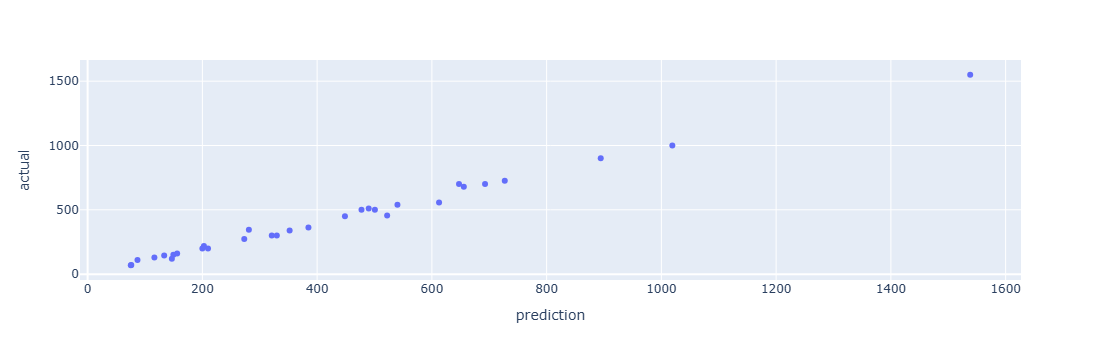

In [48]:
# Plotting "df_df_actual_vs_prediction"
fig = px.scatter(data_frame=df_actual_vs_prediction, x="prediction", y="actual")
pio.show(fig, renderer="jupyterlab")

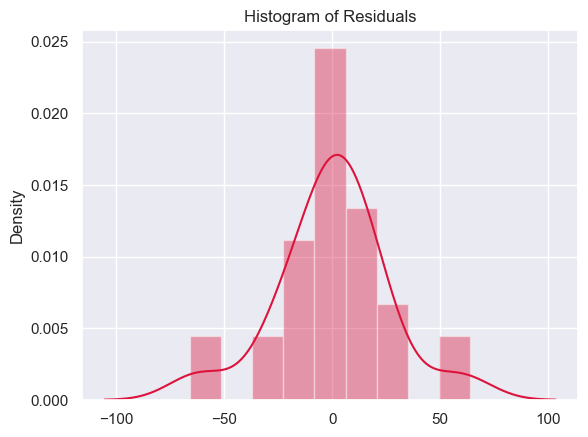

In [51]:
# Evaluating the model
residuals = y_true - y_pred
sns.distplot(residuals, color="crimson")
plt.title("Histogram of Residuals")
plt.show()

In [52]:
# Checking skewness of residuals
residuals.skew()

weight   -0.160108
dtype: float64

(-0.5, 0.5) — low or approximately symmetric.
(-1, -0.5) U (0.5, 1) — moderately skewed.
Beyond -1 and 1 — Highly skewed.

# Conclusion

- The model score is 99%, which is good.
- There are no negative values for weights.
- Histogram of residuals in normally distributed and is very near to standard normal distribution.
- The skewness of residuals shows that histogram of residuals is well-symmetric.
- So, our model with second degree of polynomial features works perfectly.